In [1]:
import numpy as np
from numpy import ma
import math
import scipy
import scipy.constants as constants
import os
from IPython.display import Image

from netCDF4 import Dataset
      
from cartopy import config
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.cm import get_cmap
from matplotlib import ticker

# from tqdm.notebook import tqdm,trange
# from matplotlib.mlab import bivariate_normal

NA = 6.022e+23

In [2]:
FILEDIR = '/n/home12/hongwei/HONGWEI/GC_run_13.0/1_plume_in_60deg/final/gc_2x25_eulerian_final'
NcFile   = Dataset(FILEDIR+'/OutputDir/GEOSChem.SpeciesConc.20150101_0005z.nc4','r',format='NETCDF4_CLASSIC')

Ap = NcFile.variables['hyai']

del NcFile

In [3]:
# 5%

FILEDIR1 = '/n/home12/hongwei/HONGWEI/GC_run_13.0/1_plume_in_60deg/Dissolving_criteria/gc_2x25_lagrange_Dissolve5'
NcFile1   = Dataset(FILEDIR1+'/OutputDir/GEOSChem.SpeciesConc.201501_02.nc4','r',format='NETCDF4_CLASSIC')

lat1             = NcFile1.variables['lat'][:]
lon1             = NcFile1.variables['lon'][:]
LA1              = NcFile1.variables['SpeciesConc_PASV_LA']
LA11             = NcFile1.variables['SpeciesConc_PASV_LA3'][:,:,:,:]
LA1 = LA1 + LA11

GC_AREA1 = NcFile1.variables['AREA'][:,:];


# 10%

FILEDIR2 = '/n/home12/hongwei/HONGWEI/GC_run_13.0/1_plume_in_60deg/final/gc_2x25_lagrange_final'
NcFile2   = Dataset(FILEDIR2+'/OutputDir/GEOSChem.SpeciesConc.201501_02.nc4','r',format='NETCDF4_CLASSIC')

lat2             = NcFile2.variables['lat'][:]
lon2             = NcFile2.variables['lon'][:]
LA2              = NcFile2.variables['SpeciesConc_PASV_LA']
LA22            = NcFile2.variables['SpeciesConc_PASV_LA3'][:,:,:,:]
LA2 = LA2 + LA22

GC_AREA2 = NcFile2.variables['AREA'][:,:];


# 15%
FILEDIR3 = '/n/home12/hongwei/HONGWEI/GC_run_13.0/1_plume_in_60deg/Dissolving_criteria/gc_2x25_lagrange_Dissolve15'
NcFile3   = Dataset(FILEDIR3+'/OutputDir/GEOSChem.SpeciesConc.201501_02.nc4','r',format='NETCDF4_CLASSIC')

lat3             = NcFile3.variables['lat'][:]
lon3             = NcFile3.variables['lon'][:]
LA3              = NcFile3.variables['SpeciesConc_PASV_LA']
LA33             = NcFile3.variables['SpeciesConc_PASV_LA3'][:,:,:,:]
LA3 = LA3 + LA33

GC_AREA3 = NcFile3.variables['AREA'][:,:];


# Eulerian 2*2.5
FILEDIR0 = '/n/home12/hongwei/HONGWEI/GC_run_13.0/1_plume_in_60deg/final/gc_2x25_eulerian_final'
NcFile0   = Dataset(FILEDIR0+'/OutputDir/GEOSChem.SpeciesConc.201501_02.nc4','r',format='NETCDF4_CLASSIC')

lat0             = NcFile0.variables['lat'][:]
lon0             = NcFile0.variables['lon'][:]

EU0              = NcFile0.variables['SpeciesConc_PASV_EU']

GC_AREA0 = NcFile0.variables['AREA'][:,:];


LA1.shape

(58, 72, 91, 144)

In [4]:
del NcFile1, NcFile2, NcFile3, NcFile0

In [5]:
Nx = len(LA1[0,0,0,:])
Ny = len(LA1[0,0,:,0])
Nz = len(LA1[0,:,0,0])
Nt = len(LA1[:,0,0,0])


#------------------------------------------------
# total air mass in each grid  ------------------
#------------------------------------------------
            
# 2x2.5
AD_file0 = Dataset(FILEDIR0+'/OutputDir/GEOSChem.StateMet.201501_02.nc4','r',format='NETCDF4_CLASSIC')
GC_AD1   = AD_file0.variables['Met_AD']
            
GC_AD1

<class 'netCDF4._netCDF4.Variable'>
float32 Met_AD(time, lev, lat, lon)
    long_name: Dry air mass
    units: kg
    averaging_method: time-averaged
unlimited dimensions: time
current shape = (59, 72, 91, 144)
filling off

In [6]:
del AD_file0


In [7]:
# for Gini and cumulative distribution function (CDF)

In [8]:
### change unit, do average 

# N1
LA1_molec = LA1[:,:,:,:]*0.0
for i in range(Nt):
    LA1_molec[i,:,:,:] = LA1[i,:,:,:]*(GC_AD1[i,:,:,:]*1000.0/28.97)*NA

LA1_Zsum = np.sum(LA1_molec[:,:,:,:], axis=1)
for i in range(Nt):
    LA1_Zsum[i,:,:]   = LA1_Zsum[i,:,:]/GC_AREA1[:,:]/1e4
    
print( np.sum(LA1_molec[Nt-1,:,:,:]) )


# N3
LA2_molec = LA2[:,:,:,:]*0.0
for i in range(Nt):
    LA2_molec[i,:,:,:] = LA2[i,:,:,:]*(GC_AD1[i,:,:,:]*1000.0/28.97)*NA

LA2_Zsum = np.sum(LA2_molec[:,:,:,:], axis=1)
for i in range(Nt):
    LA2_Zsum[i,:,:]   = LA2_Zsum[i,:,:]/GC_AREA2[:,:]/1e4
    
print( np.sum(LA2_molec[Nt-1,:,:,:]) )


# N5
LA3_molec = LA3[:,:,:,:]*0.0
for i in range(Nt):
    LA3_molec[i,:,:,:] = LA3[i,:,:,:]*(GC_AD1[i,:,:,:]*1000.0/28.97)*NA

LA3_Zsum = np.sum(LA3_molec[:,:,:,:], axis=1)
for i in range(Nt):
    LA3_Zsum[i,:,:]   = LA3_Zsum[i,:,:]/GC_AREA3[:,:]/1e4
    
    
# EU
EU0_molec = EU0[:,:,:,:]*0.0
for i in range(Nt):
    EU0_molec[i,:,:,:] = EU0[i,:,:,:]*(GC_AD1[i,:,:,:]*1000.0/28.97)*NA

EU0_Zsum = np.sum(EU0_molec[:,:,:,:], axis=1)
for i in range(Nt):
    EU0_Zsum[i,:,:]   = EU0_Zsum[i,:,:]/GC_AREA0[:,:]/1e4
    
    
print( np.sum(LA3_molec[Nt-1,:,:,:]) )

1.1057969e+30
1.1057043e+30
1.1059988e+30


In [9]:
# delete original variable to save memory
del LA1, LA2, LA3, EU0

In [10]:

LA1_area_cumsum_frac_time = []
LA2_area_cumsum_frac_time = []
LA3_area_cumsum_frac_time = []
EU0_area_cumsum_frac_time = []

LA1_mass_cumsum_frac_time = []
LA2_mass_cumsum_frac_time = []
LA3_mass_cumsum_frac_time = []
EU0_mass_cumsum_frac_time = []

for it in range(Nt):
    # concentration
    LA1_Zsum_1D = LA1_Zsum[it,:,:].reshape(Nx*Ny)
    LA2_Zsum_1D = LA2_Zsum[it,:,:].reshape(Nx*Ny)
    LA3_Zsum_1D = LA3_Zsum[it,:,:].reshape(Nx*Ny)
    EU0_Zsum_1D = EU0_Zsum[it,:,:].reshape(Nx*Ny)

    # grid cell area
    GC_AREA1_1D = GC_AREA1.reshape(Nx*Ny)
    GC_AREA2_1D = GC_AREA2.reshape(Nx*Ny)
    GC_AREA3_1D = GC_AREA3.reshape(Nx*Ny)
    GC_AREA0_1D = GC_AREA0.reshape(Nx*Ny)

    # grid cell mass for injected tracer
    LA1_molec_Zsum = np.sum(LA1_molec[it,:,:,:], axis=0)
    LA2_molec_Zsum = np.sum(LA2_molec[it,:,:,:], axis=0)
    LA3_molec_Zsum = np.sum(LA3_molec[it,:,:,:], axis=0)
    EU0_molec_Zsum = np.sum(EU0_molec[it,:,:,:], axis=0)
  
    LA1_molec_Zsum_1D = LA1_molec_Zsum.reshape(Nx*Ny)
    LA2_molec_Zsum_1D = LA2_molec_Zsum.reshape(Nx*Ny)
    LA3_molec_Zsum_1D = LA3_molec_Zsum.reshape(Nx*Ny)
    EU0_molec_Zsum_1D = EU0_molec_Zsum.reshape(Nx*Ny)


    # get index for sorted concentration
    
    LA1_index = LA1_Zsum_1D.argsort()
    LA1_area_sorted = GC_AREA1_1D[LA1_index]
    LA1_mass_sorted = LA1_molec_Zsum_1D[LA1_index]
    
    LA2_index = LA2_Zsum_1D.argsort()
    LA2_area_sorted = GC_AREA2_1D[LA2_index]
    LA2_mass_sorted = LA2_molec_Zsum_1D[LA2_index]
    
    LA3_index = LA3_Zsum_1D.argsort()
    LA3_area_sorted = GC_AREA3_1D[LA3_index]
    LA3_mass_sorted = LA3_molec_Zsum_1D[LA3_index]

    EU0_index = EU0_Zsum_1D.argsort()
    EU0_area_sorted = GC_AREA0_1D[EU0_index]
    EU0_mass_sorted = EU0_molec_Zsum_1D[EU0_index]
    
    # cumulative sum  
    LA1_area_cumsum = np.cumsum(LA1_area_sorted)
    LA1_mass_cumsum = np.cumsum(LA1_mass_sorted)
    
    LA2_area_cumsum = np.cumsum(LA2_area_sorted)
    LA2_mass_cumsum = np.cumsum(LA2_mass_sorted)
    
    LA3_area_cumsum = np.cumsum(LA3_area_sorted)
    LA3_mass_cumsum = np.cumsum(LA3_mass_sorted)

    EU0_area_cumsum = np.cumsum(EU0_area_sorted)
    EU0_mass_cumsum = np.cumsum(EU0_mass_sorted)
    
    # calculate fraction
    
    length1 = len(LA1_area_cumsum)
    LA1_area_cumsum_frac = LA1_area_cumsum/LA1_area_cumsum[length1-1]
    LA1_mass_cumsum_frac = LA1_mass_cumsum/LA1_mass_cumsum[length1-1]

    length2 = len(LA2_area_cumsum)
    LA2_area_cumsum_frac = LA2_area_cumsum/LA2_area_cumsum[length2-1]
    LA2_mass_cumsum_frac = LA2_mass_cumsum/LA2_mass_cumsum[length2-1]

    length3 = len(LA3_area_cumsum)
    LA3_area_cumsum_frac = LA3_area_cumsum/LA3_area_cumsum[length3-1]
    LA3_mass_cumsum_frac = LA3_mass_cumsum/LA3_mass_cumsum[length3-1]

    length0 = len(EU0_area_cumsum)
    EU0_area_cumsum_frac = EU0_area_cumsum/EU0_area_cumsum[length0-1]
    EU0_mass_cumsum_frac = EU0_mass_cumsum/EU0_mass_cumsum[length0-1]
    
    #
    LA1_area_cumsum_frac_time.append(LA1_area_cumsum_frac)
    LA1_mass_cumsum_frac_time.append(LA1_mass_cumsum_frac)
    
    LA2_area_cumsum_frac_time.append(LA2_area_cumsum_frac)
    LA2_mass_cumsum_frac_time.append(LA2_mass_cumsum_frac)
    
    LA3_area_cumsum_frac_time.append(LA3_area_cumsum_frac)
    LA3_mass_cumsum_frac_time.append(LA3_mass_cumsum_frac)
    
    EU0_area_cumsum_frac_time.append(EU0_area_cumsum_frac)
    EU0_mass_cumsum_frac_time.append(EU0_mass_cumsum_frac)

In [11]:
# del LA1_molec, LA2_molec, LA3_molec
# del LA1_molec_Zsum, LA2_molec_Zsum, LA3_molec_Zsum

print(LA1_area_cumsum_frac)
print(LA2_mass_cumsum_frac)


[2.5199025913025253e-05 5.0398051826050505e-05 7.559707592008635e-05 ...
 0.9997840523719788 0.9998929500579834 1.0]
[3.7953952869429486e-07 7.601204856655386e-07 1.1419347174523864e-06 ...
 0.9994738101959229 0.9997355937957764 1.0]


In [12]:
len(LA1_area_cumsum_frac),len(LA2_area_cumsum_frac)

(13104, 13104)

In [13]:
# calculate Gini coefficient

Gini_La1_time, Gini_La2_time, Gini_La3_time, Gini_Eu0_time = [], [], [], []

for it in range(Nt):
    diag = np.linspace(0,1,100)
    Al = np.trapz(diag, diag)

    LA1 = np.trapz(LA1_mass_cumsum_frac_time[it], LA1_area_cumsum_frac_time[it])
    LA2 = np.trapz(LA2_mass_cumsum_frac_time[it], LA2_area_cumsum_frac_time[it])
    LA3 = np.trapz(LA3_mass_cumsum_frac_time[it], LA3_area_cumsum_frac_time[it])
    EU0 = np.trapz(EU0_mass_cumsum_frac_time[it], EU0_area_cumsum_frac_time[it])
    
    Gini_La1 = (Al-LA1)/Al
    Gini_La2 = (Al-LA2)/Al
    Gini_La3 = (Al-LA3)/Al
    Gini_Eu0 = (Al-EU0)/Al
    
#     print(Gini_Eu3,Gini_La0)
    
    Gini_La1_time.append(Gini_La1)
    Gini_La2_time.append(Gini_La2)
    Gini_La3_time.append(Gini_La3)
    Gini_Eu0_time.append(Gini_Eu0)
    
print(Al)
print('Gini_La_Eu')
print(Gini_La1)
print(Gini_La2)


0.5
Gini_La_Eu
0.2989441156387329
0.2977709174156189


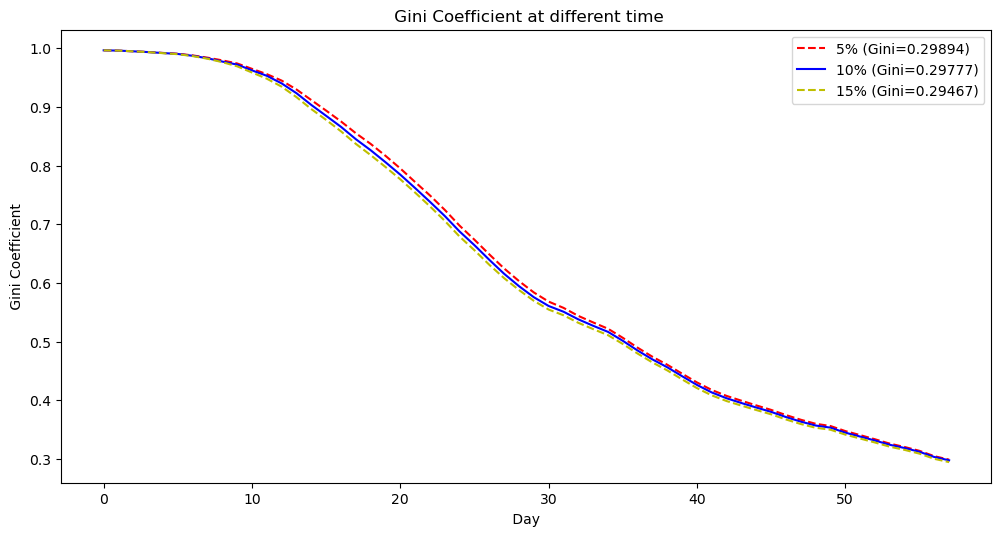

In [14]:
# Plot Gini coefficient at different time:

plt.figure(figsize=(12,6), dpi= 100)

plt.plot(Gini_La1_time,'r--',label=f'5% (Gini={Gini_La1:.5f})')
plt.plot(Gini_La2_time,'b',label=f'10% (Gini={Gini_La2:.5f})')
plt.plot(Gini_La3_time,'y--',label=f'15% (Gini={Gini_La3:.5f})')

# add line for 1day, 1mon, 1year
# a = 0.5*(Gini_La0_time[1]+Gini_Eu3_time[1])
# plt.plot([1, 1], [a, a], 'kX', label='1 day')

# a = 0.5*(Gini_La0_time[30]+Gini_Eu3_time[30])
# plt.plot([30, 30], [a, a], 'kX', label='1 mon')

# a = 0.5*(Gini_La0_time[365]+Gini_Eu3_time[365])
# plt.plot([365, 365], [a, a], 'kX', label='1 year')

#plt.legend(loc='upper left')
plt.title(' Gini Coefficient at different time')
plt.xlabel(' Day ')
plt.ylabel(' Gini Coefficient ')
plt.legend()

plt.savefig('Gini_time_series.png')


In [15]:
lev = []
for i in range(len(Ap)-1):
    lev.append( (Ap[i]+Ap[i+1])/2 )
    
np.array(lev[38])

array(52.01591)

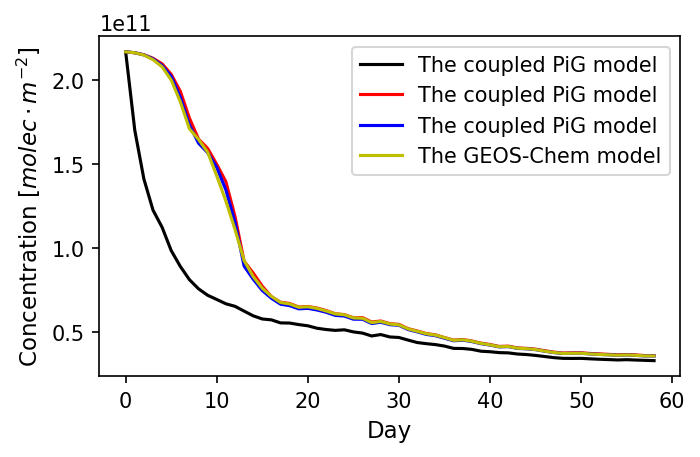

In [16]:
mass11_vertical = [np.sum(LA1_molec[0,:,:,:]) /np.sum(GC_AREA1)/1e4]
mass22_vertical = [np.sum(LA2_molec[0,:,:,:]) /np.sum(GC_AREA2)/1e4]
mass33_vertical = [np.sum(LA3_molec[0,:,:,:]) /np.sum(GC_AREA3)/1e4]
mass00_vertical = [np.sum(EU0_molec[0,:,:,:]) /np.sum(GC_AREA0)/1e4]
days = [0]

for t in range(58):
    days.append(t+1)
    # print(f'Total tracer mass [molec] in the end: ')
    mass11_vertical.append( np.sum(LA1_molec[t,38,:,:],axis=(0,1)) /np.sum(GC_AREA1)/1e4 )
    mass22_vertical.append( np.sum(LA2_molec[t,38,:,:],axis=(0,1)) /np.sum(GC_AREA2)/1e4 )
    mass33_vertical.append( np.sum(LA3_molec[t,38,:,:],axis=(0,1)) /np.sum(GC_AREA3)/1e4 )
    mass00_vertical.append( np.sum(EU0_molec[t,38,:,:],axis=(0,1)) /np.sum(GC_AREA0)/1e4 )
    
    
fig = plt.figure(figsize=(5,3), dpi=150);

plt.plot( days, mass00_vertical, 'k', label='The coupled PiG model')
plt.plot( days, mass11_vertical, 'r', label='The coupled PiG model')
plt.plot( days, mass22_vertical, 'b', label='The coupled PiG model')
plt.plot( days, mass33_vertical, 'y', label='The GEOS-Chem model')

plt.xlabel('Day', fontsize=11);
plt.ylabel('Concentration [$molec \cdot m^{-2}$]', fontsize=11);
plt.legend();

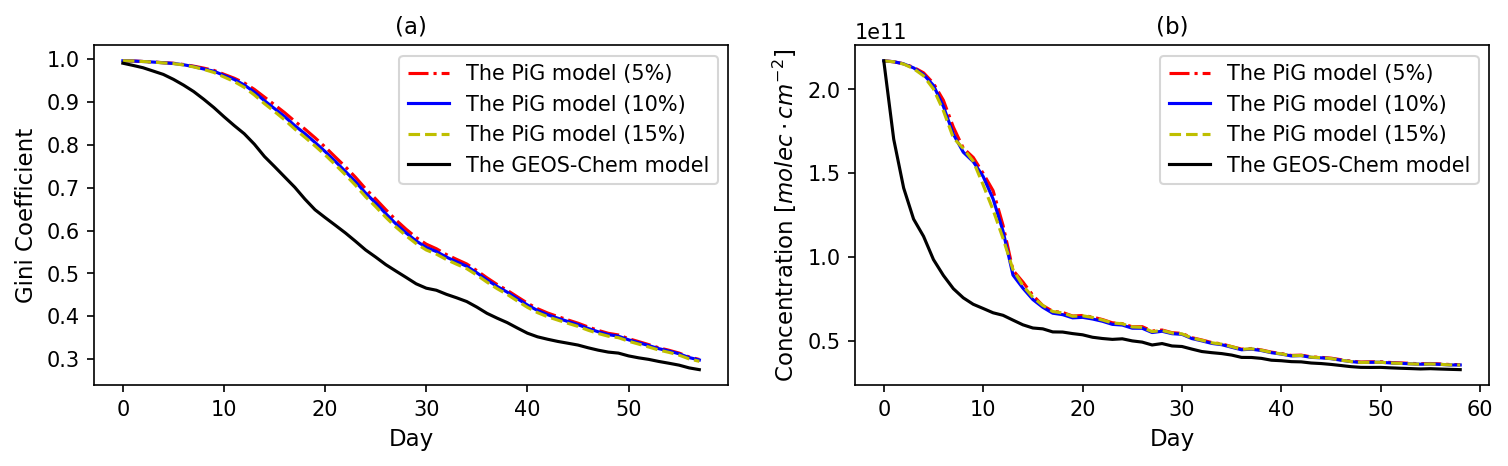

In [20]:
fig = plt.figure(figsize=(12,3), dpi=150);
#     gs = fig.add_gridspec(15, 8)

# (1)
ax1 = plt.subplot(1,2,1);
ax1.plot(Gini_La1_time,'r-.',label='The PiG model (5%)')
ax1.plot(Gini_La2_time,'b',label='The PiG model (10%)')
ax1.plot(Gini_La3_time,'y--',label='The PiG model (15%)')

ax1.plot(Gini_Eu0_time,'k',label=f'The GEOS-Chem model')


ax1.set_title('(a)', fontsize=11)
ax1.set_xlabel('Day', fontsize=11)
ax1.set_ylabel('Gini Coefficient', fontsize=11)
ax1.legend()

# (2)
ax2 = plt.subplot(1,2,2);
ax2.plot( days, mass11_vertical, 'r-.', label='The PiG model (5%)')
ax2.plot( days, mass22_vertical, 'b', label='The PiG model (10%)')
ax2.plot( days, mass33_vertical, 'y--', label='The PiG model (15%)')

ax2.plot( days, mass00_vertical, 'k', label='The GEOS-Chem model')

ax2.set_title('(b)', fontsize=11)
ax2.set_xlabel('Day', fontsize=11);
ax2.set_ylabel('Concentration [$molec \cdot cm^{-2}$]', fontsize=11);
ax2.legend();

plt.savefig('Figure_S3_Splitting_number.png')

In [18]:
Gini_La1_time[20],Gini_La2_time[20],Gini_La3_time[20]

(0.7950838059186935, 0.7844736576080322, 0.7765689790248871)

In [19]:
mass11_vertical[20],mass22_vertical[20],mass33_vertical[20]

(65265282842.624, 64162818424.832, 65106912634.4704)